<a href="https://colab.research.google.com/github/BeaEsparcia/Sentiment_Analysis_on_X/blob/main/Sentiment_Analysis_on_X_Feminism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project performs sentiment analysis on a collection of tweets discussing feminism. The main goal is to identify and categorize the predominant emotions in these posts using a pre-trained Natural Language Processing (NLP) model.

In [1]:
# Install dependencies (if needed)
!pip install transformers pandas matplotlib

# Import necessary libraries
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt


In [2]:
# Load the sentiment analysis pipeline with a pre-trained model
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [3]:
# List of tweets to analyze
tweets = [
    "El feminismo arruinó el mundo y algunas aún no la ven.",
    "@perezreverte Sobre mujer y #feminismo hay mucho ruido, y a veces, mucha demagogia y mucho folclore...",
    "Erradicando toda clase de injusticias: El Movimiento Feminista es inherentemente interseccional...",
    "La mejor ministra que ha tenido este país #irenemontero #feminismo",
    "Todas las políticas woke quieren acabar con el prototipo de hombre necesario para la sociedad",
    "Y finalmente la #masculinidad #tóxica se basa en lo q dije pq si la mujer deja de depender de un hombre...",
    "Me cago en la cuotas vaginales. Ahora resulta que la empresa que me echó de la formación se arrepiente...",
    "SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marzo #8M",
    "En el autobús, 8 personas hablando de machismo en España...",
    "El feminismo es la justicia de este siglo #feminismo #irenemontero #8M",
    "Sin #Abolición de la #Prostitución, no habrá igualdad El #Feminismo es #Abolicionista...",
    "Viva la LUCHA FEMINISTA #feminismo #igualdad #8M",
    "«No hay barrera cerradura, ni cerrojo que puedas imponer a la libertad de tu mente» Virginia Woolf...",
    "Emmeline Pankhurst fue la líder del movimiento feminista y sufragista del Reino Unido...",
    "Las feministas vandalizaron el #8M la Universidad del Rosario en #Bogota...",
    "#Feminismo #Hombres #Mujeres #DerechosHumanos Lo dicho: Las feministas tienen envidia de pene.",
    "Las denuncias falsas no existen ya... Al menos 1 de cada 7 de todos los hombres ha sufrido una acusación falsa...",
    "Miles de hombres se suicidan en nuestro país cada año...",
    "No somos mujeres. Les damos igual. No. No les damos igual. Peor aún…",
    "No, no hay ningún problema con estar sola. El problema radica en la razón por la que estás sola..."
]


In [4]:
# Analyze the sentiment of each tweet
sentiment_results = []
for tweet in tweets:
    result = nlp(tweet)
    label = result[0]['label']
    score = result[0]['score']
    sentiment_results.append({"text": tweet, "label": label, "score": score})


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [5]:
# Convert results to a DataFrame
df_results = pd.DataFrame(sentiment_results)

# Simplify model labels
df_results['label'] = df_results['label'].replace({
    "1 star": "Very Negative",
    "2 stars": "Negative",
    "3 stars": "Neutral",
    "4 stars": "Positive",
    "5 stars": "Very Positive"
})


In [6]:
# Display the final DataFrame
print(df_results[['text', 'label']])


                                                 text          label
0   El feminismo arruinó el mundo y algunas aún no...  Very Negative
1   @perezreverte Sobre mujer y #feminismo hay muc...       Negative
2   Erradicando toda clase de injusticias: El Movi...  Very Negative
3   La mejor ministra que ha tenido este país #ire...  Very Positive
4   Todas las políticas woke quieren acabar con el...  Very Positive
5   Y finalmente la #masculinidad #tóxica se basa ...  Very Negative
6   Me cago en la cuotas vaginales. Ahora resulta ...  Very Negative
7   SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marz...  Very Negative
8   En el autobús, 8 personas hablando de machismo...  Very Negative
9   El feminismo es la justicia de este siglo #fem...  Very Positive
10  Sin #Abolición de la #Prostitución, no habrá i...  Very Negative
11   Viva la LUCHA FEMINISTA #feminismo #igualdad #8M  Very Positive
12  «No hay barrera cerradura, ni cerrojo que pued...  Very Positive
13  Emmeline Pankhurst fue la líde

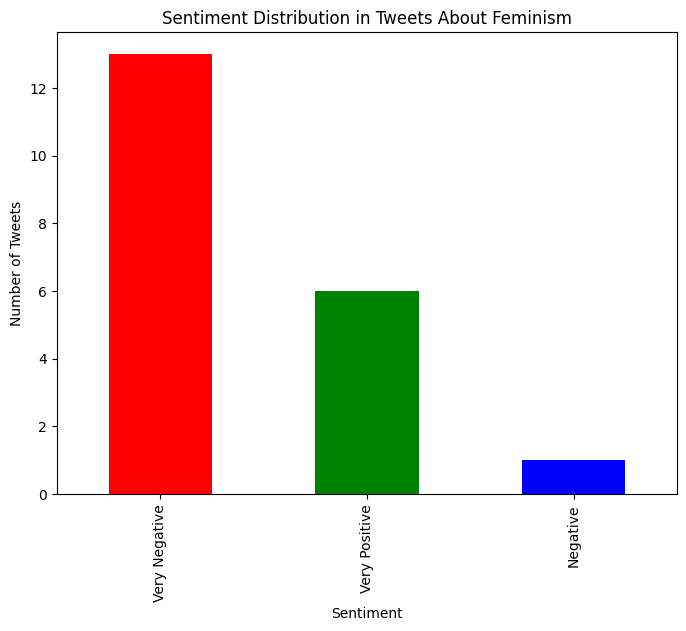

In [7]:
# Count of tweets by category
final_count = df_results['label'].value_counts()

# Bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
final_count.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution in Tweets About Feminism')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
